# Análise ROI - Regressão Linear

## Importar o arquivo

In [38]:
import pandas as pd
import numpy as np

In [39]:
# Professor(a) aqui o sr(a) coloca o caminho pro arquivo csv, como nós usamos linux não precisa do "r" na frente da string de caminho
# Se estiver usando windows, por favor use
df = pd.read_csv('/home/gbrlmoraes/git_reps/FIAP_PBLs__2024_2/PBL_fase_5/dados/Gastos_Publicidade_MelhoresCompras.csv', decimal = ',')
df.rename(columns = {
    'Ano' : 'ano',
    'Mes' : 'mes',
    'Tipo de Midia' : 'tipo_midia',
    'Gastos com Publicidade (em R$)' : 'gasto',
    'Previsao Inicial de Aumento de Vendas (em mil unidades)' : 'roi'
}, inplace = True)
df.head()

,ano,mes,tipo_midia,gasto,roi
0,2022,1,Paginas web,87000.0,1000
1,2022,1,Redes sociais,120000.0,800
2,2022,1,TV,250000.0,1500
3,2022,1,Jornal,110000.0,730
4,2022,1,Revista,40000.0,360


## Separação em treino e teste

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x = df.drop(columns = ['ano', 'mes', 'roi'])
x.head()

,tipo_midia,gasto
0,Paginas web,87000.0
1,Redes sociais,120000.0
2,TV,250000.0
3,Jornal,110000.0
4,Revista,40000.0


In [42]:
y = df['roi']
y.head()

0    1000
1     800
2    1500
3     730
4     360
Name: roi, dtype: int64

In [43]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 78)

## Análise dos dados de treino

In [44]:
x_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 160 to 197
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tipo_midia  160 non-null    object 
 1   gasto       160 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


## Aplicando One-Hot-Encoding

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder(sparse_output = False)

In [47]:
encoded = encoder.fit_transform(x_treino[['tipo_midia']])

In [48]:
encoded_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out(['tipo_midia']))
encoded_df.head()

,tipo_midia_Google,tipo_midia_Instagram,tipo_midia_Jornal,tipo_midia_Paginas web,tipo_midia_Radio,tipo_midia_Redes sociais,tipo_midia_Revista,tipo_midia_TV
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Ordenando linhas do dataset de treino para juntar com os dados one-hot
x_treino.reset_index(drop = True, inplace = True)

In [50]:
# Juntando os datasets
x_treino_encoded = pd.concat([x_treino, encoded_df], axis = 1)

# Removendo coluna de tipo de mídia
x_treino_encoded.drop(columns = ['tipo_midia'], inplace = True)
x_treino_encoded.head()

,gasto,tipo_midia_Google,tipo_midia_Instagram,tipo_midia_Jornal,tipo_midia_Paginas web,tipo_midia_Radio,tipo_midia_Redes sociais,tipo_midia_Revista,tipo_midia_TV
0,174900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33600.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,196000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,270000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,190000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Treinando o modelo

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
fiapinho = LinearRegression(fit_intercept = False)
# Como temos muitas variáveis dummy, podemos evitar o termo  do modelo

In [53]:
fiapinho.fit(x_treino_encoded, y_treino)

LinearRegression(fit_intercept=False)

In [54]:
# Analisando os coeficientes da regressão linear
df_coef = pd.DataFrame({
    'variavel' : x_treino_encoded.columns,
    'coeficiente' : fiapinho.coef_
})
df_coef

,variavel,coeficiente
0,gasto,0.011313
1,tipo_midia_Google,2920.305994
2,tipo_midia_Instagram,2826.396776
3,tipo_midia_Jornal,-348.855789
4,tipo_midia_Paginas web,281.445573
5,tipo_midia_Radio,-218.998274
6,tipo_midia_Redes sociais,-493.652472
7,tipo_midia_Revista,-86.859176
8,tipo_midia_TV,-1084.853837


## Avaliando modelo

In [55]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [56]:
y_pred = fiapinho.predict(x_treino_encoded)

### Dados de treino

In [57]:
r2_score_treino = r2_score(
    y_pred, y_treino
)
print(f'Valor do R2 no treino: {r2_score_treino:.3f}')

Valor do R2 no treino: 0.965


In [58]:
rmse_treino = root_mean_squared_error(
    y_pred, y_treino
)
print(f'Valor do erro médio no treino: R${rmse_treino:.2f}')

Valor do erro médio no treino: R$205.26


### Dados de teste

In [59]:
### Tratando dados de teste

# Aplicando one-hot
encoded = encoder.transform(x_teste[['tipo_midia']])
encoded_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out(['tipo_midia']))

# Ordenando linhas do dataset de teste para juntar com os dados one-hot
x_teste.reset_index(drop = True, inplace = True)

# Juntando os datasets
x_teste_encoded = pd.concat([x_teste, encoded_df], axis = 1)

# Removendo coluna de tipo de mídia
x_teste_encoded.drop(columns = ['tipo_midia'], inplace = True)
x_teste_encoded.head()

,gasto,tipo_midia_Google,tipo_midia_Instagram,tipo_midia_Jornal,tipo_midia_Paginas web,tipo_midia_Radio,tipo_midia_Redes sociais,tipo_midia_Revista,tipo_midia_TV
0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24640.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,154336.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,235200.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,80000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [60]:
y_pred_teste = fiapinho.predict(x_teste_encoded)

In [61]:
r2_score_teste = r2_score(
    y_pred_teste, y_teste
)
print(f'Valor do R2 no teste: {r2_score_teste:.3f}')

Valor do R2 no teste: 0.950


In [62]:
rmse_teste = root_mean_squared_error(
    y_pred_teste, y_teste
)
print(f'Valor do erro médio no teste: R${rmse_teste:.2f}')

Valor do erro médio no teste: R$222.14


# Modelo Final

## Treinamento

In [63]:
# Aplicando one-hot
encoder_final = OneHotEncoder(sparse_output = False) 
encoded = encoder_final.fit_transform(x[['tipo_midia']])
encoded_df = pd.DataFrame(encoded, columns = encoder_final.get_feature_names_out(['tipo_midia']))

# Ordenando linhas do dataset de teste para juntar com os dados one-hot
x.reset_index(drop = True, inplace = True)

# Juntando os datasets
x_encoded = pd.concat([x, encoded_df], axis = 1)

# Removendo coluna de tipo de mídia
x_encoded.drop(columns = ['tipo_midia'], inplace = True)

# Construindo regressão linear
super_fiapinho = LinearRegression(fit_intercept = False)
super_fiapinho.fit(x_encoded, y)

LinearRegression(fit_intercept=False)

In [64]:
# Analisando os coeficientes da regressão linear
df_coef = pd.DataFrame({
    'variavel' : x_encoded.columns,
    'coeficiente' : super_fiapinho.coef_
})
df_coef

,variavel,coeficiente
0,gasto,0.011215
1,tipo_midia_Google,2937.843720
2,tipo_midia_Instagram,2884.110822
3,tipo_midia_Jornal,-392.225025
4,tipo_midia_Paginas web,278.184051
5,tipo_midia_Radio,-202.890960
6,tipo_midia_Redes sociais,-470.909719
7,tipo_midia_Revista,-77.037152
8,tipo_midia_TV,-1068.801855


## Métricas de performance

In [65]:
y_pred_final = super_fiapinho.predict(x_encoded)

In [66]:
r2_score_final = r2_score(
    y_pred_final, y
)
print(f'Valor do R2 final: {r2_score_final:.3f}')

Valor do R2 final: 0.964


In [67]:
rmse_final = root_mean_squared_error(
    y_pred_final, y
)
print(f'Valor do erro médio final: R${rmse_final:.2f}')

Valor do erro médio final: R$207.14


# Análises para o time de marketing

## Matriz de correlação

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
def correlation_matrix(correlation_matrix, ax = None, vmin = -1, vmax = 1):
    '''
    Description:
        - Plots a cool correlation matrix, based on seaborn heatmap
    Arguments:
        - Correlation Matrix Dataset (Ex: "df.corr()")
    '''
    
    # Creates a triangular shaped mask based on the original matrix
    tri_mask = np.triu(np.ones_like(correlation_matrix))

    # Plot the triangular heat map
    sns.heatmap(
        data = correlation_matrix,
        mask = tri_mask,
        annot = True,
        cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True),
        ax = ax,
        vmin = vmin,
        vmax = vmax
    )

In [70]:
corr = df.drop(columns = 'tipo_midia').corr()
corr

,ano,mes,gasto,roi
ano,1.000000,-0.287773,0.090054,0.355515
mes,-0.287773,1.000000,0.309766,0.176617
gasto,0.090054,0.309766,1.000000,0.564744
roi,0.355515,0.176617,0.564744,1.000000


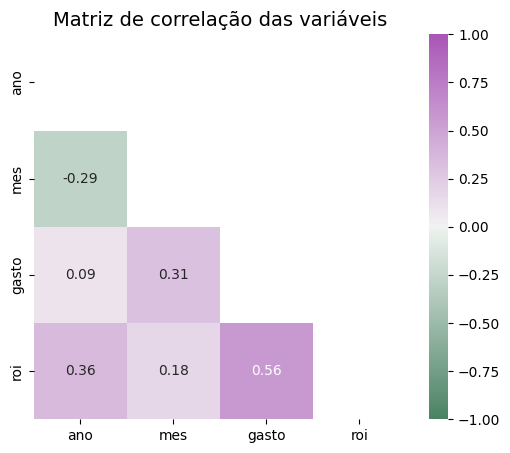

In [71]:
plt.figure(figsize = (6, 5))
correlation_matrix(corr)
plt.title('Matriz de correlação das variáveis', fontsize = 14)
plt.show()

## Gráficos de dispersão

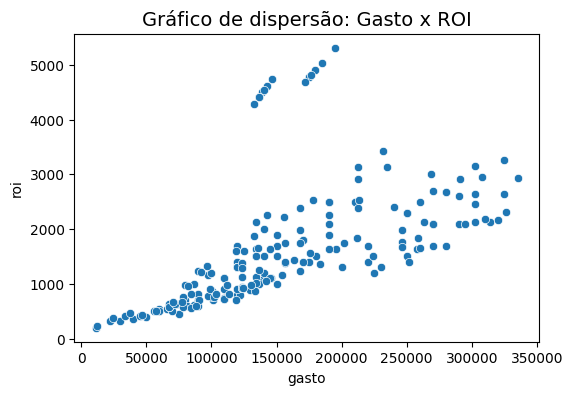

In [72]:
plt.figure(figsize = (6, 4))
sns.scatterplot(
    x = 'gasto',
    y = 'roi',
    data = df
)
plt.title('Gráfico de dispersão: Gasto x ROI', fontsize = 14)
plt.show()

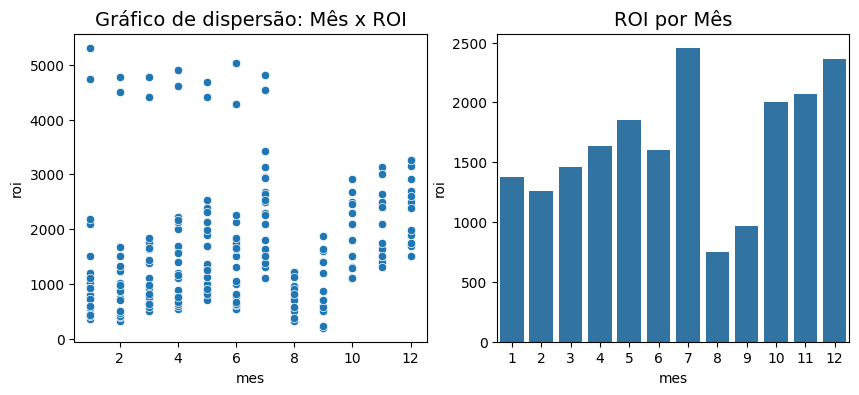

In [73]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(4)

sns.scatterplot(
    x = 'mes',
    y = 'roi',
    data = df,
    ax = axes[0]
)
axes[0].set_title('Gráfico de dispersão: Mês x ROI', fontsize = 14)

sns.barplot(
    x = 'mes',
    y = 'roi',
    data = df,
    errorbar = None,
    ax = axes[1]
)
axes[1].set_title('ROI por Mês', fontsize = 14)

plt.show()

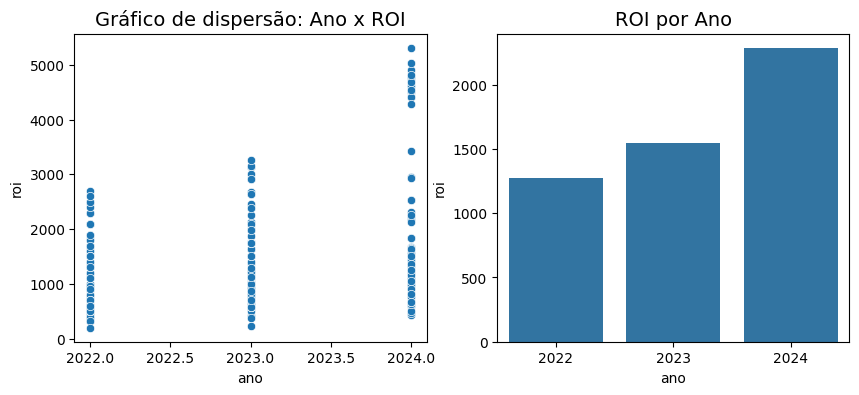

In [74]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(4)

sns.scatterplot(
    x = 'ano',
    y = 'roi',
    data = df,
    ax = axes[0]
)
axes[0].set_title('Gráfico de dispersão: Ano x ROI', fontsize = 14)

sns.barplot(
    x = 'ano',
    y = 'roi',
    data = df,
    errorbar = None,
    ax = axes[1]
)
axes[1].set_title('ROI por Ano', fontsize = 14)

plt.show()

# Relatório para o time de marketing